In [1]:
#Install the library
!pip install pandas scikit-learn matplotlib seaborn


In [2]:
from google.colab import files
files.upload()  # Upload kaggle.json file

# Install Kaggle CLI
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d spscientist/students-performance-in-exams
!unzip students-performance-in-exams.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
License(s): unknown
Archive:  students-performance-in-exams.zip
  inflating: StudentsPerformance.csv  


In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("StudentsPerformance.csv")

# Create columns based on the desired structure
df['assignment_score'] = (df['reading score'] + df['writing score']) / 20  # Scale to 0–10
df['attendance_rate'] = np.random.randint(75, 100, size=len(df))  # Simulate attendance
df['midterm_score'] = df['math score'] / 10  # Scale to 0–10
df['final_score'] = df['writing score'] / 10  # Scale to 0–10
df['gpa'] = (df['assignment_score'] + df['midterm_score'] + df['final_score']) / 3  # Calculate GPA

# Keep only the required columns
df_model = df[['assignment_score', 'attendance_rate', 'midterm_score', 'final_score', 'gpa']]
df_model.head()

,assignment_score,attendance_rate,midterm_score,final_score,gpa
0,7.30,93,7.2,7.4,7.300000
1,8.90,78,6.9,8.8,8.200000
2,9.40,94,9.0,9.3,9.233333
3,5.05,92,4.7,4.4,4.716667
4,7.65,97,7.6,7.5,7.583333


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X = df_model.drop(columns=['gpa'])
y = df_model['gpa']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 7.000709125528937e-30
R2 Score: 1.0


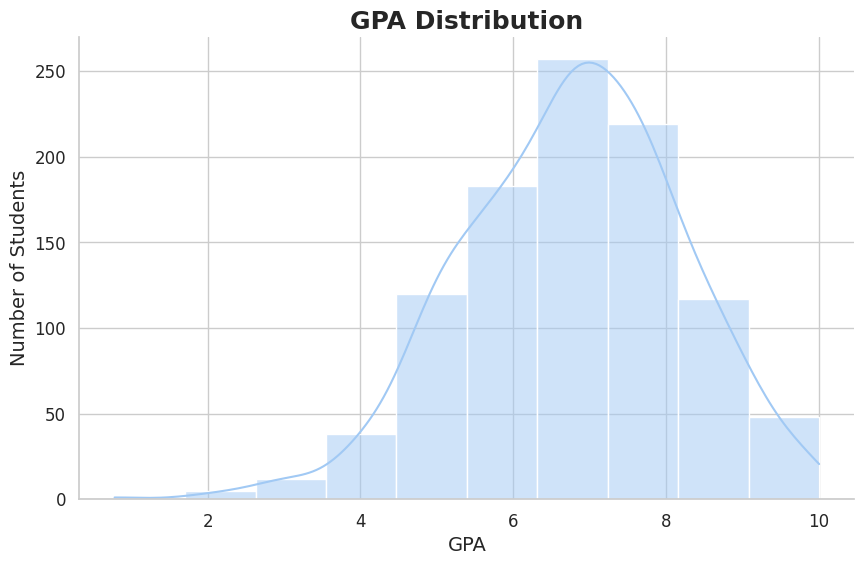

<ipython-input-10-59bac1c7b54f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['category'] = df_model['gpa'].apply(classify_gpa)


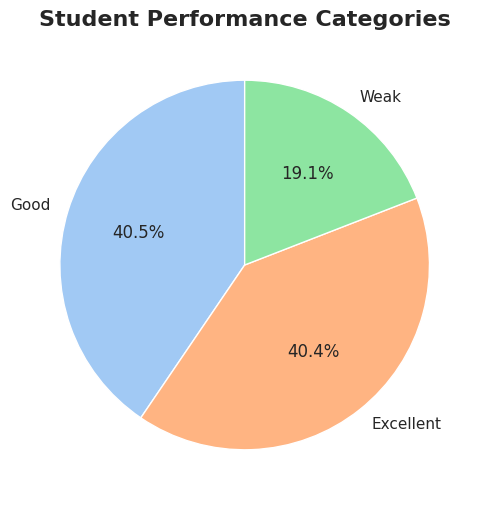

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aesthetic style
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.facecolor'] = 'white'

#GPA Distribution
plt.figure()
sns.histplot(df_model['gpa'], bins=10, kde=True)
plt.title("GPA Distribution", fontsize=18, weight='bold')
plt.xlabel("GPA", fontsize=14)
plt.ylabel("Number of Students", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

#Classify academic performance
def classify_gpa(gpa):
    if gpa >= 8: return "Excellent"
    elif gpa >= 6.5: return "Good"
    else: return "Weak"

df_model['category'] = df_model['gpa'].apply(classify_gpa)

# Pie Chart aesthetic
colors = sns.color_palette('pastel')[0:3]

df_model['category'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    labels=["Good", "Excellent", "Weak"],
    wedgeprops={'edgecolor': 'white'}
)
plt.title("Student Performance Categories", fontsize=16, weight='bold')
plt.ylabel("")
plt.show()



In [11]:
# Save the processed data to a CSV file
df_model.to_csv("processed_students_data.csv", index=False)